In [ ]:
from google.colab import files
files.upload()

Saving apple_grany.jpg to apple_grany.jpg


{'apple_grany.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x01,\x01,\x00\x00\xff\xe1\x1adExif\x00\x00II*\x00\x08\x00\x00\x00\x10\x00\x00\x01\x03\x00\x01\x00\x00\x00\xc0\x1c\x00\x00\x01\x01\x03\x00\x01\x00\x00\x000\x13\x00\x00\x02\x01\x03\x00\x03\x00\x00\x00\xce\x00\x00\x00\x06\x01\x03\x00\x01\x00\x00\x00\x02\x00\x00\x00\x0f\x01\x02\x00\x12\x00\x00\x00\xe4\x00\x00\x00\x10\x01\x02\x00\x0b\x00\x00\x00\xf6\x00\x00\x00\x12\x01\x03\x00\x01\x00\x00\x00\x01\x00\x00\x00\x15\x01\x03\x00\x01\x00\x00\x00\x03\x00\x00\x00\x1a\x01\x05\x00\x01\x00\x00\x00\xd4\x00\x00\x00\x1b\x01\x05\x00\x01\x00\x00\x00\xdc\x00\x00\x00(\x01\x03\x00\x01\x00\x00\x00\x02\x00\x00\x001\x01\x02\x003\x00\x00\x00\x02\x01\x00\x002\x01\x02\x00\x14\x00\x00\x006\x01\x00\x00\x13\x02\x03\x00\x01\x00\x00\x00\x02\x00\x00\x00i\x87\x04\x00\x01\x00\x00\x00J\x01\x00\x00%\x88\x04\x00\x01\x00\x00\x00\xfe\x03\x00\x00\x10\x04\x00\x00\x08\x00\x08\x00\x08\x00\xc0\xc6-\x00\x10\'\x00\x00\xc0\xc6-\x00\x10\'\x00\x00NIKON CORPORATION\x00NIKO

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json  # set permission

kaggle.json


In [ ]:
!wget 'https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/rp73yg93n8-1.zip'

--2021-02-28 11:45:03--  https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/rp73yg93n8-1.zip
Resolving md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)... 52.218.57.168
Connecting to md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)|52.218.57.168|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 418811602 (399M) [application/octet-stream]
Saving to: ‘rp73yg93n8-1.zip’

rp73yg93n8-1.zip    100%[===================>] 399.41M  35.1MB/s    in 12s     

2021-02-28 11:45:15 (33.1 MB/s) - ‘rp73yg93n8-1.zip’ saved [418811602/418811602]



In [ ]:
!unzip '/content/fruit.zip'

Archive:  /content/fruit.zip
  inflating: fruits-360_dataset.zip  


In [ ]:
!unzip '/content/fruits-360_dataset.zip'

In [ ]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
import os

In [ ]:
num_classes = 81
img_rows , img_cols =32,32
batch_size = 16

train_data_dir = '/content/fruits-360/Training'
validation_data_dir = '/content/fruits-360/Test'

# Lets use data augmentation
train_datagen = ImageDataGenerator(
    rescale = 1. /255,
    rotation_range = 30,
    width_shift_range = 0.3,
    height_shift_range = 0.3,
    horizontal_flip = True
)

validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size = (img_rows , img_cols),
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle = True
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size = (img_rows,img_cols),
    batch_size = batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 41322 images belonging to 81 classes.
Found 13877 images belonging to 81 classes.


In [ ]:
# Model 
model = Sequential()

model.add(Conv2D(32 , (3,3) , 
                 padding = 'same', 
                 input_shape=(img_rows,img_cols,3)))
model.add(Activation('relu'))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        1

In [ ]:
from keras.optimizers import RMSprop,SGD
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

In [ ]:
checkpoint = ModelCheckpoint("/content/Checkpoints/fruits_cnn_1.h5",
                             montior = "val_loss",
                             mode = "min",
                             save_best_only = True,
                             verbose = 1
                             )

earlystop = EarlyStopping(monitor='val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

# Now put these callbacks in collection
callbacks = [earlystop , checkpoint , reduce_lr]

In [ ]:
model.compile(loss = 'categorical_crossentropy',optimizer=RMSprop(learning_rate=0.001),metrics=['accuracy'])

nb_train_samples = 41322
nb_validation_samples = 13877
epochs = 10

history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
2582/2582 [==============================] - 56s 19ms/step - loss: 2.8505 - accuracy: 0.2254 - val_loss: 0.5818 - val_accuracy: 0.7966

Epoch 00001: val_loss improved from inf to 0.58182, saving model to /content/Checkpoints/fruits_cnn_1.h5
Epoch 2/10
2582/2582 [==============================] - 48s 19ms/step - loss: 0.7540 - accuracy: 0.7532 - val_loss: 0.3217 - val_accuracy: 0.8998

Epoch 00002: val_loss improved from 0.58182 to 0.32166, saving model to /content/Checkpoints/fruits_cnn_1.h5
Epoch 3/10
2582/2582 [==============================] - 48s 19ms/step - loss: 0.5428 - accuracy: 0.8364 - val_loss: 0.3461 - val_accuracy: 0.8723

Epoch 00003: val_loss did not improve from 0.32166
Epoch 4/10
2582/2582 [==============================] - 48s 19ms/step - loss: 0.4981 - accuracy: 0.8562 - val_loss: 0.5602 - val_accuracy: 0.8651

Epoch 00004: val_loss did not improve from 0.32166
Epoch 5/10
2582/2582 [==============================] - 48s 19ms/step - loss: 0.5296 - accuracy:

In [ ]:
# Confusion matrix and Classification report
import numpy as np
from sklearn.metrics import classification_report , confusion_matrix

# Configure matrix and report
Y_pred = model.predict_generator(validation_generator,nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred,axis = 1)
print('Confusion matrix')
print(confusion_matrix(validation_generator.classes , y_pred))
print('Classification Report')
class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes , y_pred,target_names = target_names))


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion matrix
[[163   0   0 ...   0   0   0]
 [  0 163   0 ...   0   0   0]
 [  0   0 164 ...   0   0   0]
 ...
 [  0   0   0 ... 162   0   0]
 [  0   0   0 ...   0 127   0]
 [  0   0   0 ...   0   0 249]]
Classification Report
                     precision    recall  f1-score   support

     Apple Braeburn       0.55      0.99      0.70       164
     Apple Golden 1       0.95      0.99      0.97       164
     Apple Golden 2       0.96      1.00      0.98       164
     Apple Golden 3       0.96      1.00      0.98       161
 Apple Granny Smith       1.00      1.00      1.00       164
        Apple Red 1       1.00      0.60      0.75       164
        Apple Red 2       1.00      0.87      0.93       164
        Apple Red 3       0.69      1.00      0.82       144
Apple Red Delicious       0.99      1.00      0.99       166
   Apple Red Yellow       1.00      0.74      0.85       164
            Apricot       1.00      1.00      1.00       164
            Avocado       1.00      

{'Apple Braeburn': 0, 'Apple Golden 1': 1, 'Apple Golden 2': 2, 'Apple Golden 3': 3, 'Apple Granny Smith': 4, 'Apple Red 1': 5, 'Apple Red 2': 6, 'Apple Red 3': 7, 'Apple Red Delicious': 8, 'Apple Red Yellow': 9, 'Apricot': 10, 'Avocado': 11, 'Avocado ripe': 12, 'Banana': 13, 'Banana Red': 14, 'Cactus fruit': 15, 'Cantaloupe 1': 16, 'Cantaloupe 2': 17, 'Carambula': 18, 'Cherry 1': 19, 'Cherry 2': 20, 'Cherry Rainier': 21, 'Cherry Wax Black': 22, 'Cherry Wax Red': 23, 'Cherry Wax Yellow': 24, 'Clementine': 25, 'Cocos': 26, 'Dates': 27, 'Granadilla': 28, 'Grape Pink': 29, 'Grape White': 30, 'Grape White 2': 31, 'Grapefruit Pink': 32, 'Grapefruit White': 33, 'Guava': 34, 'Huckleberry': 35, 'Kaki': 36, 'Kiwi': 37, 'Kumquats': 38, 'Lemon': 39, 'Lemon Meyer': 40, 'Limes': 41, 'Lychee': 42, 'Mandarine': 43, 'Mango': 44, 'Maracuja': 45, 'Melon Piel de Sapo': 46, 'Mulberry': 47, 'Nectarine': 48, 'Orange': 49, 'Papaya': 50, 'Passion Fruit': 51, 'Peach': 52, 'Peach Flat': 53, 'Pear': 54, 'Pear Ab

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


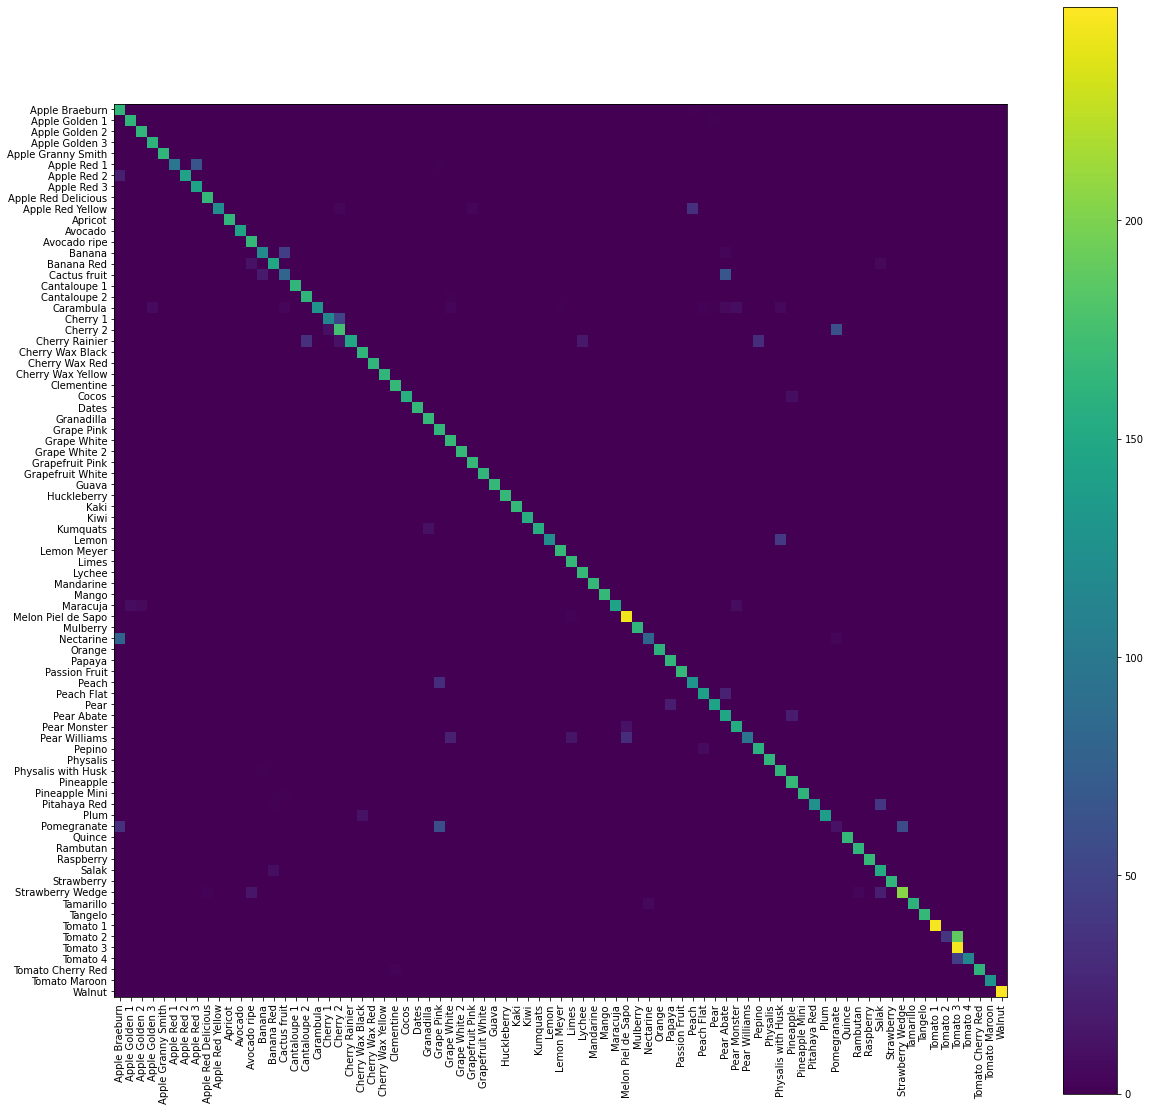

In [ ]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from keras.models import load_model

img_row, img_height, img_depth = 32,32,3
model = load_model('/content/Checkpoints/fruits_cnn_1.h5')

class_labels = validation_generator.class_indices
print(class_labels)
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

nb_train_samples = 41322
nb_validation_samples = 13877

#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

target_names = list(class_labels.values())

plt.figure(figsize=(20,20))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)

plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


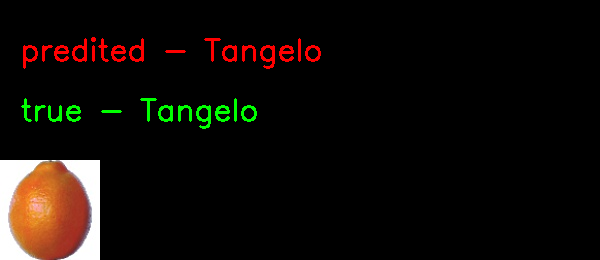

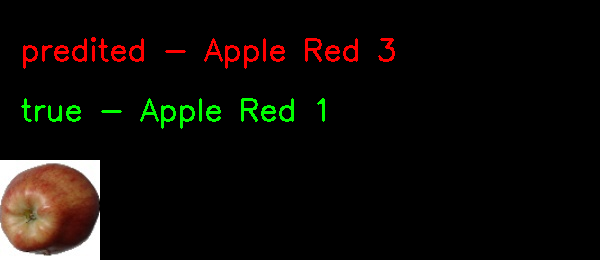

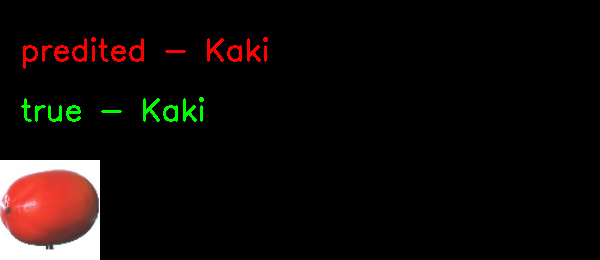

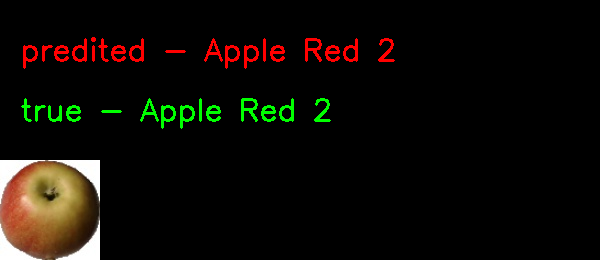

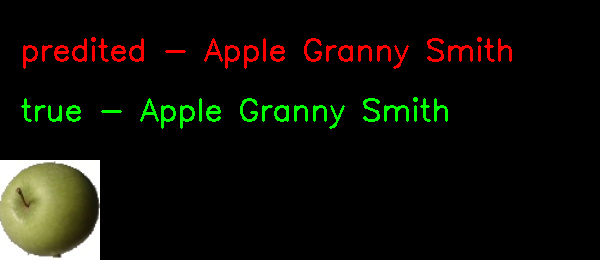

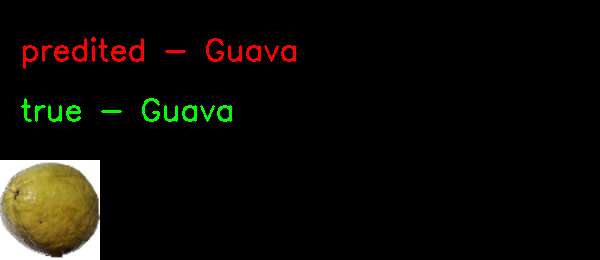

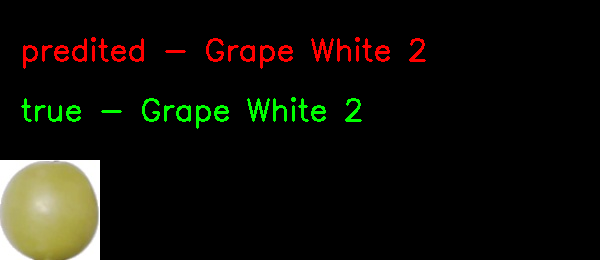

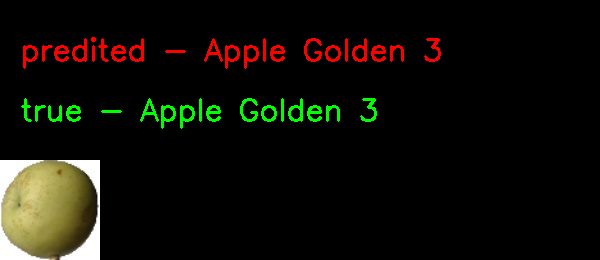

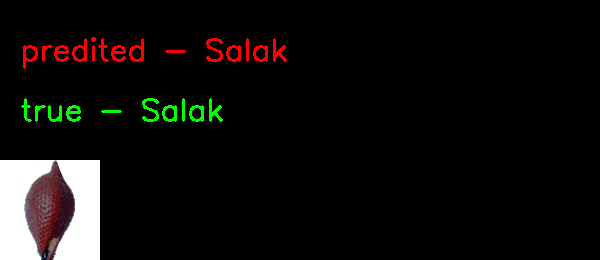

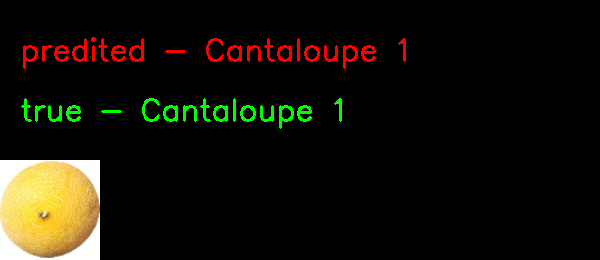

In [ ]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import os
import cv2
import numpy as np
from os import listdir
from os.path import isfile, join
import re
from google.colab.patches import cv2_imshow

def draw_test(name, pred, im, true_label):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(im, 160, 0, 0, 500 ,cv2.BORDER_CONSTANT,value=BLACK)
    cv2.putText(expanded_image, "predited - "+ pred, (20, 60) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2)
    cv2.putText(expanded_image, "true - "+ true_label, (20, 120) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,255,0), 2)
    cv2_imshow(expanded_image)


def getRandomImage(path, img_width, img_height):
    """function loads a random images from a random folder in our test path """
    folders = list(filter(lambda x: os.path.isdir(os.path.join(path, x)), os.listdir(path)))
    random_directory = np.random.randint(0,len(folders))
    path_class = folders[random_directory]
    file_path = path + path_class
    file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]
    random_file_index = np.random.randint(0,len(file_names))
    image_name = file_names[random_file_index]
    final_path = file_path + "/" + image_name
    return image.load_img(final_path, target_size = (img_width, img_height)), final_path, path_class

# dimensions of our images
img_width, img_height = 32, 32


files = []
predictions = []
true_labels = []
# predicting images
for i in range(0, 10):
    path = '/content/fruits-360/Test/' 
    img, final_path, true_label = getRandomImage(path, img_width, img_height)
    files.append(final_path)
    true_labels.append(true_label)
    x = image.img_to_array(img)
    x = x * 1./255
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size = 10)
    predictions.append(classes)
    
for i in range(0, len(files)):
    image = cv2.imread((files[i]))
    draw_test("Prediction", class_labels[predictions[i][0]], image, true_labels[i])
    cv2.waitKey(0)

cv2.destroyAllWindows()

In [ ]:
def draw_test_New_Image(name, pred, im, true_label):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(im, 160, 0, 0, 0 ,cv2.BORDER_CONSTANT,value=BLACK)
    cv2.putText(expanded_image, "predited - "+ pred, (20, 60) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2)
    cv2.putText(expanded_image, "true - "+ true_label, (20, 120) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,255,0), 2)
    cv2_imshow(expanded_image)

In [ ]:
class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

input_im = cv2.imread('/content/apple_grany.jpg')
imageL = cv2.resize(input_im, (500,500), interpolation = cv2.INTER_CUBIC)
input_im = cv2.resize(input_im, (32,32), interpolation = cv2.INTER_AREA)
input_im = input_im.reshape(1,32,32,3) 

input_im  = image.load_img(final_path, target_size = (img_width, img_height))

## Get Prediction
res = model.predict_classes(input_im, 1, verbose = 0)[0]
print(class_labels[res])
draw_test_New_Image('A',class_labels[res],imageL,'Apple')

Cantaloupe 1


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
